# Check average time of mice staying in one place

In [1]:
from typing import Tuple

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats

from dataloader import BaseDataset
from utils.util import segment
from param import *


In [2]:

segment_len_all = []
for i, data_dir in enumerate(ParamDir().data_list):
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"
    dataset = BaseDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    y = dataset._discretize_coords()

    segment_ind = segment(y)
    segment_len = round((segment_ind[0]+1)/3, 2)
    segment_len_all.append([segment_len, data_name, mouse_type])
    for i in range(1, len(segment_ind)):
        segment_len = round((segment_ind[i]-segment_ind[i-1])/3, 2)
        segment_len_all.append([segment_len, data_name, mouse_type])

plot_data = pd.DataFrame(segment_len_all, columns=["time in one position (s)", "data name", "mouse type"])


## t-test

In [3]:
stats.ttest_ind(plot_data[plot_data["mouse type"]=="KO"]["time in one position (s)"], 
                plot_data[plot_data["mouse type"]=="WT"]["time in one position (s)"])

Ttest_indResult(statistic=-7.178390578351806, pvalue=1.0282736287656534e-12)

## plot

In [4]:
def label_diff(i,j,text,ind,Y, errors, ax, barh):
    y = 1.1*max(Y[i]+errors[i], Y[j]+errors[j])

    lx, rx = ind[i], ind[j]
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]

    kwargs = dict(ha='center', va='bottom')
    mid = ((lx+rx)/2, y+barh)

    ax.plot(barx, bary, c='black')
    ax.text(*mid, text, **kwargs)


Text(0.5, 0.98, 'time at one position (KO<WT)')

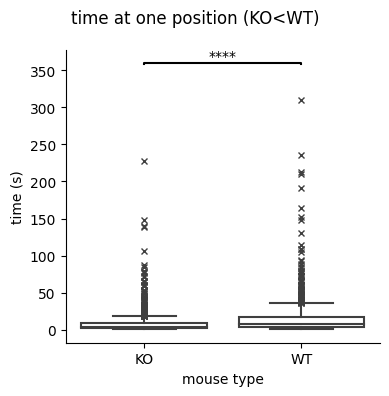

In [5]:
ind = range(len(plot_data))
means = plot_data.groupby("mouse type")["time in one position (s)"].mean()
errors = plot_data.groupby("mouse type")["time in one position (s)"].max()

fig, ax = plt.subplots(figsize=(4,4),sharey=True, tight_layout=True)
sns.despine()

sns.boxplot(
    x="mouse type", 
    y="time in one position (s)", 
    boxprops={"facecolor": (0, 0, 0, 0)}, 
    data=plot_data, 
    flierprops={"marker": "x"}, 
    ax=ax
    )

ax.set_xlabel("mouse type")
ax.set_ylabel("time (s)")
label_diff(0, 1, "****", ind=ind, Y=means, errors=errors, ax=ax, barh=1)

# ax.set_title("time of staying at one position")
plt.suptitle("time at one position (KO<WT)")